<a href="https://colab.research.google.com/github/bentech28/AI-E-101-May-17--2024---Bounyamine-Baparape/blob/main/2_Assignment_SL_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 Assignment

## Preface

One of the first steps in the analysis of a new dataset, often as part of data cleaning, typically involves generation of high-level summaries, such as: how many observations, attributes, which ones are predictors and which ones are (could be?) outcomes, what are their ranges, distributions, percentages of missing values, how strongly correlated are the predictors among themselves and with the outcome(s), etc. It is usually at this stage when we develop our initial intuition about the level of difficulty of the problem and of the challenges presented by this dataset and therefore form our first set of ideas as to how to approach it. There are many multivariate methods under the unsupervised learning umbrella that are extremely useful in this setting (that will be introduced later in the course), but first things first, and here we will start by loading few datasets into Python and exploring their attributes in the form of bivariate plots and contingency tables (where applicable).

For this assignment, we will use several datasets available from [UCI machine learning repository](http://archive.ics.uci.edu/ml/datasets.html). They can be loaded into Python using appropriate functions (such as `pd.read_csv` from pandas library) with necessary options (like `sep` for defining field separator and `header` for instructing the function to use fields in the first line as column headers). You can use URLs as paths to the datasets directly or download them locally for offline usage, then provide the local paths to the loading functions. Remember, `help(pd.read_csv)` or pandas documentation will provide you with details about these functions and their parameters.

For datasets without explicit column names, you may assign them explicitly. Note that categorical variables encoded as integers may need appropriate handling in Python to ensure correct interpretation by analysis functions.

The code examples and their outputs presented below illustrate some of these basic steps as applied to one of the datasets available from UCI. The assignment tasks that follow will require you to apply similar approaches to generate high-level summaries for other UCI datasets.

Here is the link the dataset http://archive.ics.uci.edu/dataset/43/haberman+s+survival


In [ ]:
import pandas as pd

# Define URLs and paths
uci_root = "http://archive.ics.uci.edu/ml/machine-learning-databases/"
dat_url = "haberman/haberman.data"
full_url = uci_root + dat_url

# Load dataset into pandas DataFrame
hab_dat = pd.read_csv(full_url, sep=',', header=None)

# Assign column names
col_names = ["age", "year", "nodes", "surv"]
hab_dat.columns = col_names

# Summarize the 'surv' column
surv_summary = hab_dat['surv'].describe()

print(surv_summary)


    0   1  2  3
0  30  64  1  1
1  30  62  3  1
2  30  65  0  1
3  31  59  2  1
4  31  65  4  1
count    306.000000
mean       1.264706
std        0.441899
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: surv, dtype: float64


In [ ]:
import pandas as pd

# The survival codes in column 'surv' are 1 (survived) and 2 (did not survive).
# Here we convert the column into a factor using a trick: we index a length 2 vector
# ["yes", "no"] with the values of 'habDat['surv']'. The result will have the same
# length as the number of indices used (i.e., the length of 'habDat['surv']!).
# Furthermore, each 1 in 'habDat['surv']' will select "yes" and each 2 will select "no".
# As a result, we end up with a vector of "yes"/"no" values. You could use if-else
# conditions instead to achieve the same result.

# Load dataset into pandas DataFrame
uci_root = "http://archive.ics.uci.edu/ml/machine-learning-databases/"
dat_url = "haberman/haberman.data"
full_url = uci_root + dat_url
hab_dat = pd.read_csv(full_url, sep=',', header=None)

# Assign column names
col_names = ["age", "year", "nodes", "surv"]
hab_dat.columns = col_names

# Convert 'surv' column to "yes" or "no"
hab_dat['surv'] = hab_dat['surv'].apply(lambda x: "yes" if x == 1 else "no")

# Summarize the 'surv' column
surv_summary = hab_dat['surv'].describe()

print(surv_summary)


count     306
unique      2
top       yes
freq      225
Name: surv, dtype: object


In this Python code:

- The dataset is loaded into a pandas DataFrame.
- Column names are assigned after loading.
- The 'surv' column is converted from numeric values (1 and 2) to categorical values ("yes" and "no") using a lambda function with `apply()`.
- Summary statistics for the 'surv' column are computed using `describe()` method of pandas Series.


In [ ]:

# Convert 'surv' column to categorical (factor)
hab_dat['surv'] = pd.Categorical(hab_dat['surv'])

# Summarize the categorical variable 'surv'
surv_summary = hab_dat['surv'].describe()

print(surv_summary)

count     306
unique      2
top       yes
freq      225
Name: surv, dtype: object


The following two examples show generation of xy-scatterplots of age vs node count for the patients in this dataset with color indicating their survival past 5 years. First we use basic plotting capabilities in Python:




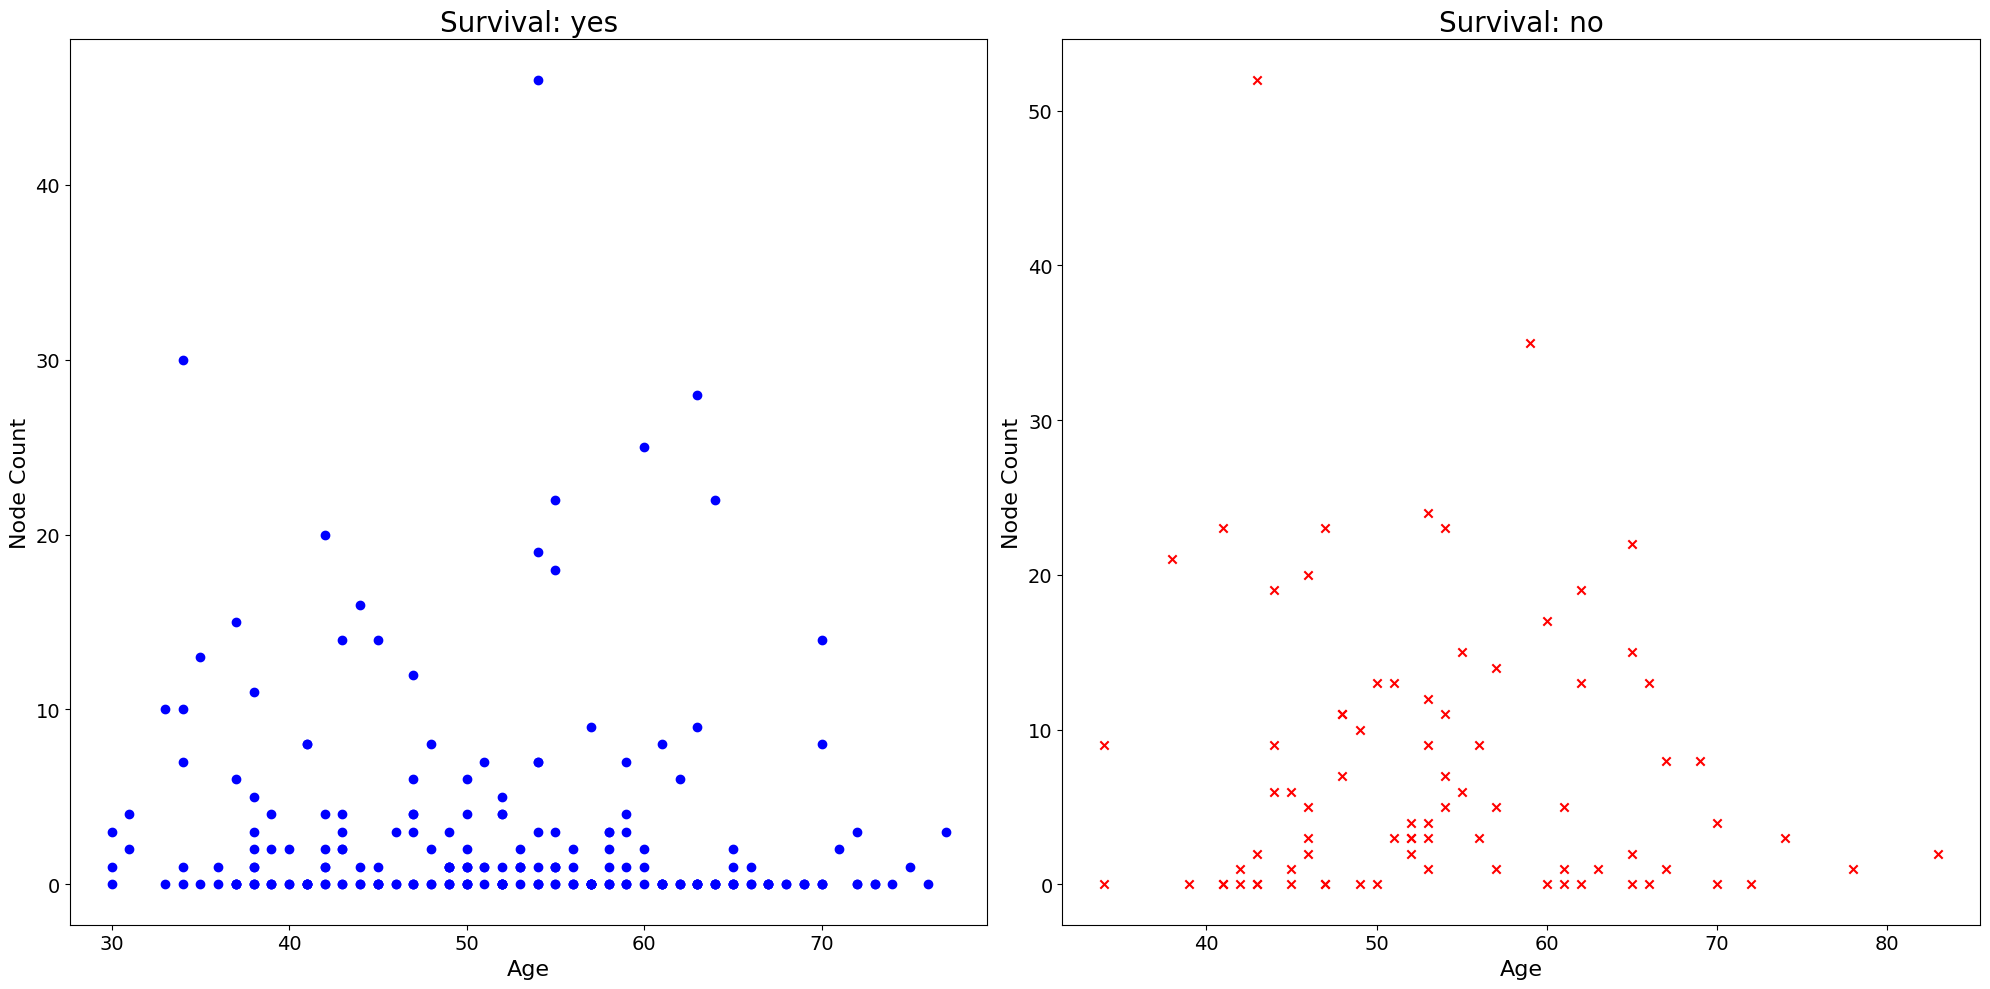

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Set some graphic parameters for prettier plotting
plt.rcParams['figure.figsize'] = (20, 10)  # Adjust figure size for two side-by-side plots
plt.rcParams['axes.titlesize'] = 20  # Increase title font size
plt.rcParams['axes.labelsize'] = 16  # Increase axis labels font size
plt.rcParams['xtick.labelsize'] = 14  # Increase x-axis tick labels font size
plt.rcParams['ytick.labelsize'] = 14  # Increase y-axis tick labels font size

# We want to plot two scatter plots side by side and keep axis limits the same for better comparison.
# You could use 'xlim' and 'ylim' graphical parameters (see docs for 'plot.default'), but note a different
# trick shown here: we first plot the *full* dataset with plotting type "n" (none).
# This plot type would perform all the preparatory work (including setting up axes) but it just would not plot
# the actual data points. Thus for each of the two plots we are generating,
# we set the axis limits in exactly the same way, to accommodate the whole
# dataset, and then we *add* into the plots (using function points()) only
# those points that we do want shown into the prepared plot; use the integer iTmp to set color and dot shape.
plt.figure()

# Scatter plot for 'surv = "yes"'
plt.subplot(1, 2, 1)
plt.scatter(hab_dat.loc[hab_dat['surv'] == "yes", 'age'], hab_dat.loc[hab_dat['surv'] == "yes", 'nodes'],
            color='blue', label='Survived', marker='o')
plt.title('Survival: yes')
plt.xlabel('Age')
plt.ylabel('Node Count')

# Scatter plot for 'surv = "no"'
plt.subplot(1, 2, 2)
plt.scatter(hab_dat.loc[hab_dat['surv'] == "no", 'age'], hab_dat.loc[hab_dat['surv'] == "no", 'nodes'],
            color='red', label='Not Survived', marker='x')
plt.title('Survival: no')
plt.xlabel('Age')
plt.ylabel('Node Count')

plt.tight_layout()  # Adjust layout for better spacing between plots
plt.show()


Now we will generate the same plots using seaborn in Python:




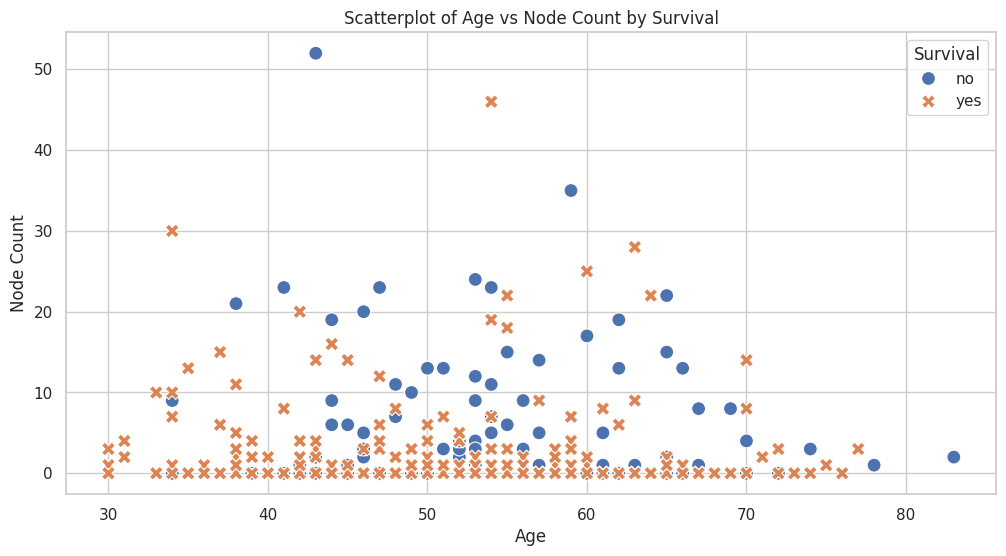

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the seaborn style
sns.set(style="whitegrid")

# Create scatter plots using seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='nodes', hue='surv', style='surv', data=hab_dat, s=100)
plt.title('Scatterplot of Age vs Node Count by Survival')
plt.xlabel('Age')
plt.ylabel('Node Count')
plt.legend(title='Survival', loc='upper right')
plt.show()

It seems that a higher number of nodes might be associated with a lower probability of survival: note the dense strip of nodes=0 points in the survival=yes plot. Some patients with high node counts do survive, but it’s a small fraction compared to all those with node=0. In contrast, the majority of patients in the survival=no plot had at least some nodes, indicating that a high node count is overrepresented in the survival=no category. One approach to quantifying this relationship could involve testing the association between survival indicators and node counts exceeding arbitrarily chosen cutoffs (such as zero or the 75th percentile, as shown below). Additionally, there is a significant degree of overplotting in this dataset due to integer values of node count and year. For instance, this can obscure the fact that not all patients with zero nodes survive, especially if all data points were plotted together and colored by the survival category ('surv' in this case).


In [ ]:
# Create a new column 'nodes0' in hab_dat DataFrame to indicate if nodes are zero
hab_dat['nodes0'] = hab_dat['nodes'] == 0

# Display the contingency table of 'surv' and 'nodes0' columns
contingency_table = pd.crosstab(hab_dat['surv'], hab_dat['nodes0'])
print(contingency_table)


nodes0  False  True 
surv                
no         62     19
yes       108    117


In [ ]:
import numpy as np

# Calculate the 75th percentile of 'nodes' column
nodes_75th_percentile = np.quantile(hab_dat['nodes'], q=0.75)

# Create a new column 'nodes75' in hab_dat DataFrame to indicate if nodes are >= 75th percentile
hab_dat['nodes75'] = hab_dat['nodes'] >= nodes_75th_percentile

# Display the contingency table of 'surv' and 'nodes75' columns
contingency_table = pd.crosstab(hab_dat['surv'], hab_dat['nodes75'])
print(contingency_table)


nodes75  False  True 
surv                 
no          39     42
yes        178     47


Please feel free to model your solutions after the examples shown above, while exercising necessary judgment as to which attributes are best represented as continuous and which ones are categorical, etc. The descriptions of homework problems provide some guidance as to what is expected, but leave some of those choices up to you. Making such decisions is an integral part of any data analysis project, and we will be focusing on enhancing this skill throughout this course.


### Problem 1 (30 points)

#### 1.1 Banknote Authentication

This dataset presents a classification problem distinguishing between authentic and counterfeit bank notes using continuous predictors derived from image processing. More details about the underlying data can be found at [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/banknote+authentication). To load data into Python, you can use the file located at "http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt".

**Steps to Approach:**

1. **Loading the Dataset:** Use appropriate methods in Python (e.g., pandas' `read_csv`) to load the dataset into a DataFrame.
   
2. **Naming Dataset Attributes:** Assign meaningful names to dataset attributes after loading.

3. **Determining Dataset Characteristics:**
   - **Variables:** Identify the number of variables (predictors and outcome).
   - **Predictors and Outcome:** Clearly define which variables serve as predictors and which one is the outcome.
   - **Observations:** Determine the number of observations in the dataset.

4. **Summary Statistics:** Generate a summary of the dataset using descriptive statistics methods available in pandas.

5. **Pairwise XY Scatterplots:** Create pairwise XY scatterplots for each pair of continuous predictors, using color and/or shape to differentiate between authentic and counterfeit bank notes.

6. **Observations and Informative Variables:**
   - Describe observations from the scatterplots.
   - Discuss which variables are likely to be informative in discriminating between forged and genuine bank notes based on visual analysis.

7. **Problem Complexity Assessment:**
   - Assess whether the problem appears to be easy or hard to solve based on initial observations.
   - Discuss tradeoffs associated with the classification task, such as the cost associated with misclassifying genuine and counterfeit bank notes.
   - Consider the practical frequency of these cases and how it could impact the decision-making process.

Python libraries such as pandas, matplotlib, and seaborn will be utilized for data loading, analysis, and visualization tasks.


### Problem 2 (30 points)

#### 2.1 Abalone Age

This dataset focuses on a regression problem: predicting the age of abalones (a type of mollusc) from various physical measurements. More details about the data can be found at the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Abalone). To load the data into Python, you can use the file located at "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data".

**Steps to Approach:**

1. **Loading the Dataset:** Use Python's pandas library to load the dataset into a DataFrame.

2. **Naming Dataset Attributes:** Assign meaningful names to the dataset attributes after loading.

3. **Determining Dataset Characteristics:**
   - **Variables:** Identify the number of variables.
   - **Predictors and Outcome:** Distinguish between predictors (categorical vs. continuous) and the outcome variable.
   - **Observations:** Determine the number of observations in the dataset.

4. **Summary Statistics:** Generate a summary of the dataset using pandas' descriptive statistics methods.

5. **Pairwise XY Scatterplots:** Create pairwise XY scatterplots for each pair of continuous predictors using seaborn or matplotlib to visualize relationships between variables.

6. **Observations and Informative Attributes:**
   - Describe your observations from the scatterplots.
   - Discuss which attributes might be more useful for predicting the age of abalones based on the visual analysis.

7. **Extra Credit (10 points):**
   - For some continuous and categorical predictors, generate boxplots to illustrate the relationships between them and discuss any patterns or insights.

Python libraries such as pandas, matplotlib, and seaborn will be utilized for data loading, analysis, and visualization tasks.


### 1. Loading the Dataset

In [1]:
import pandas as pd

# Load the dataset
url_banknote = "http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
banknote_data = pd.read_csv(url_banknote, header=None)


### 2. Naming Dataset Attributes

In [3]:
# Assign meaningful names to the columns
banknote_data.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
print(banknote_data.head())

   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


### 3.  Determining Dataset Characteristics

In [4]:
# Identify the number of variables (columns)
num_variables = banknote_data.shape[1]

# Define predictors and outcome
predictors = banknote_data.columns[:-1]
outcome = 'Class'

# Determine the number of observations (rows)
num_observations = banknote_data.shape[0]

# Generate summary statistics
summary_stats = banknote_data.describe()

print(f"Number of variables: {num_variables}")
print(f"Predictors: {predictors}")
print(f"Outcome: {outcome}")
print(f"Number of observations: {num_observations}")
print(summary_stats)


Number of variables: 5
Predictors: Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')
Outcome: Class
Number of observations: 1372
          Variance     Skewness     Curtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


### 4. Pairwise XY Scatterplots

<Figure size 1500x1000 with 0 Axes>

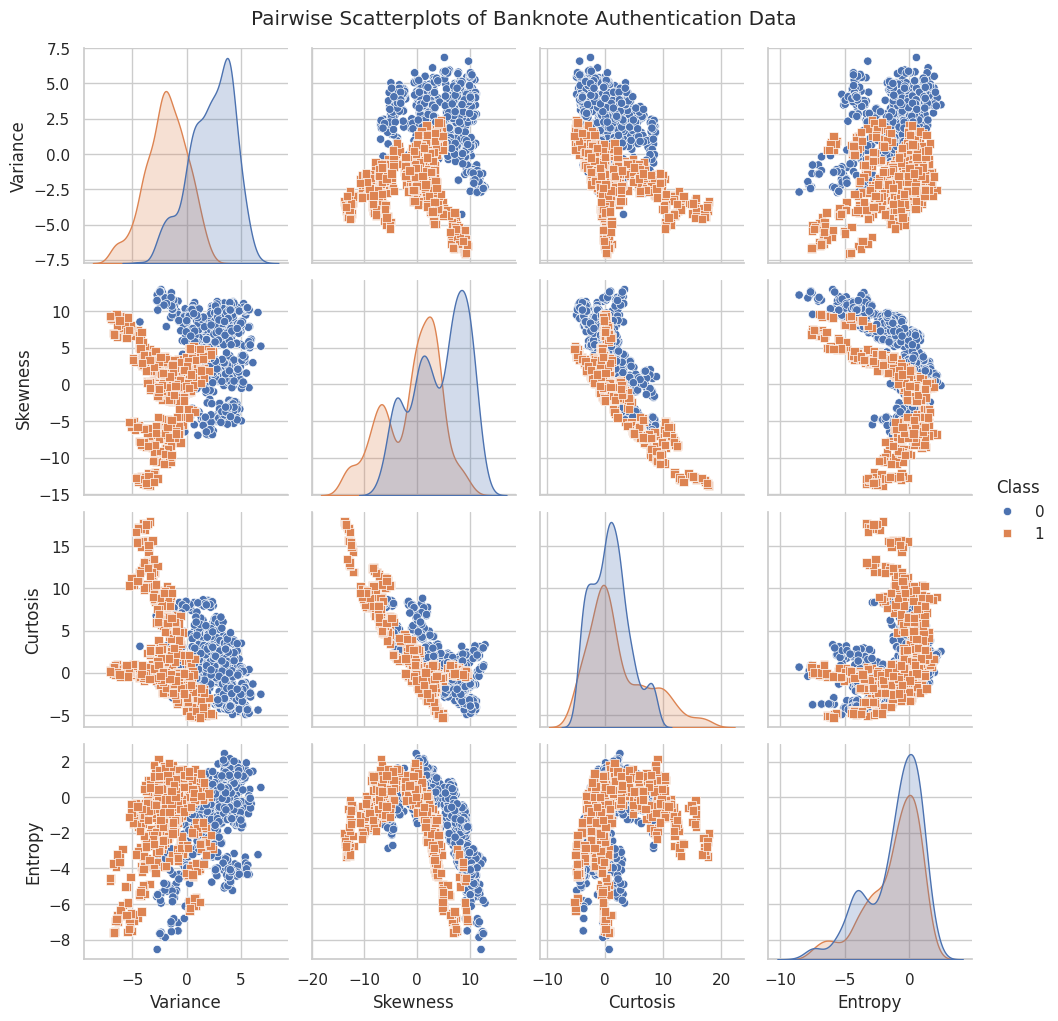

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the seaborn style
sns.set(style="whitegrid")

# Create pairwise scatterplots for banknote data
plt.figure(figsize=(15, 10))
sns.pairplot(banknote_data, hue='Class', markers=["o", "s"])
plt.suptitle('Pairwise Scatterplots of Banknote Authentication Data', y=1.02)
plt.show()


Description of Results
From the pairwise scatterplots of the banknote data, several observations can be made:

Variance vs. Skewness: There's a noticeable separation between the authentic and counterfeit bank notes. Authentic notes tend to cluster differently from counterfeit notes, indicating that these variables are likely informative for classification.

Variance vs. Curtosis: Similar to the previous plot, there's a distinct clustering pattern that suggests these two features can help differentiate between authentic and counterfeit notes.

Skewness vs. Curtosis: The separation is less pronounced compared to the Variance vs. Skewness plot, but there is still some degree of distinction between the classes.

Variance vs. Entropy: There is a visible pattern where authentic and counterfeit notes form different clusters, indicating that these features are also valuable for distinguishing between classes.

### 5. Observations and Informative Variables
From the scatterplots, we can observe which variables show distinct separation between classes. Describe the observations based on visual analysis:

Variance and Skewness may show good separation between classes.
Curtosis and Entropy might provide additional information but may overlap.

### 6. Problem Complexity Assessment
Based on initial observations, discuss the complexity:

Easy or Hard: If clear separation is visible, it might be easier to classify; otherwise, it could be challenging.
Tradeoffs: Misclassifying genuine notes as counterfeit could lead to customer dissatisfaction, while the reverse could result in financial losses.

# Problem 2: Abalone Age

### 1. Loading the Dataset

In [7]:
# Load the dataset
url_abalone = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone_data = pd.read_csv(url_abalone, header=None)

### 2. Naming Dataset Attributes

In [9]:
# Assign meaningful names to the columns
abalone_data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
print(abalone_data.head())

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


### 3. Determining Dataset Characteristics

In [10]:
# Identify the number of variables (columns)
num_variables_abalone = abalone_data.shape[1]

# Define predictors and outcome
predictors_abalone = abalone_data.columns[:-1]
outcome_abalone = 'Rings'

# Determine the number of observations (rows)
num_observations_abalone = abalone_data.shape[0]

# Generate summary statistics
summary_stats_abalone = abalone_data.describe()

print(f"Number of variables: {num_variables_abalone}")
print(f"Predictors: {predictors_abalone}")
print(f"Outcome: {outcome_abalone}")
print(f"Number of observations: {num_observations_abalone}")
print(summary_stats_abalone)


Number of variables: 9
Predictors: Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
      dtype='object')
Outcome: Rings
Number of observations: 4177
            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight        Rings  
count     4177.000000  

### 4. Pairwise XY Scatterplots

<Figure size 1500x1000 with 0 Axes>

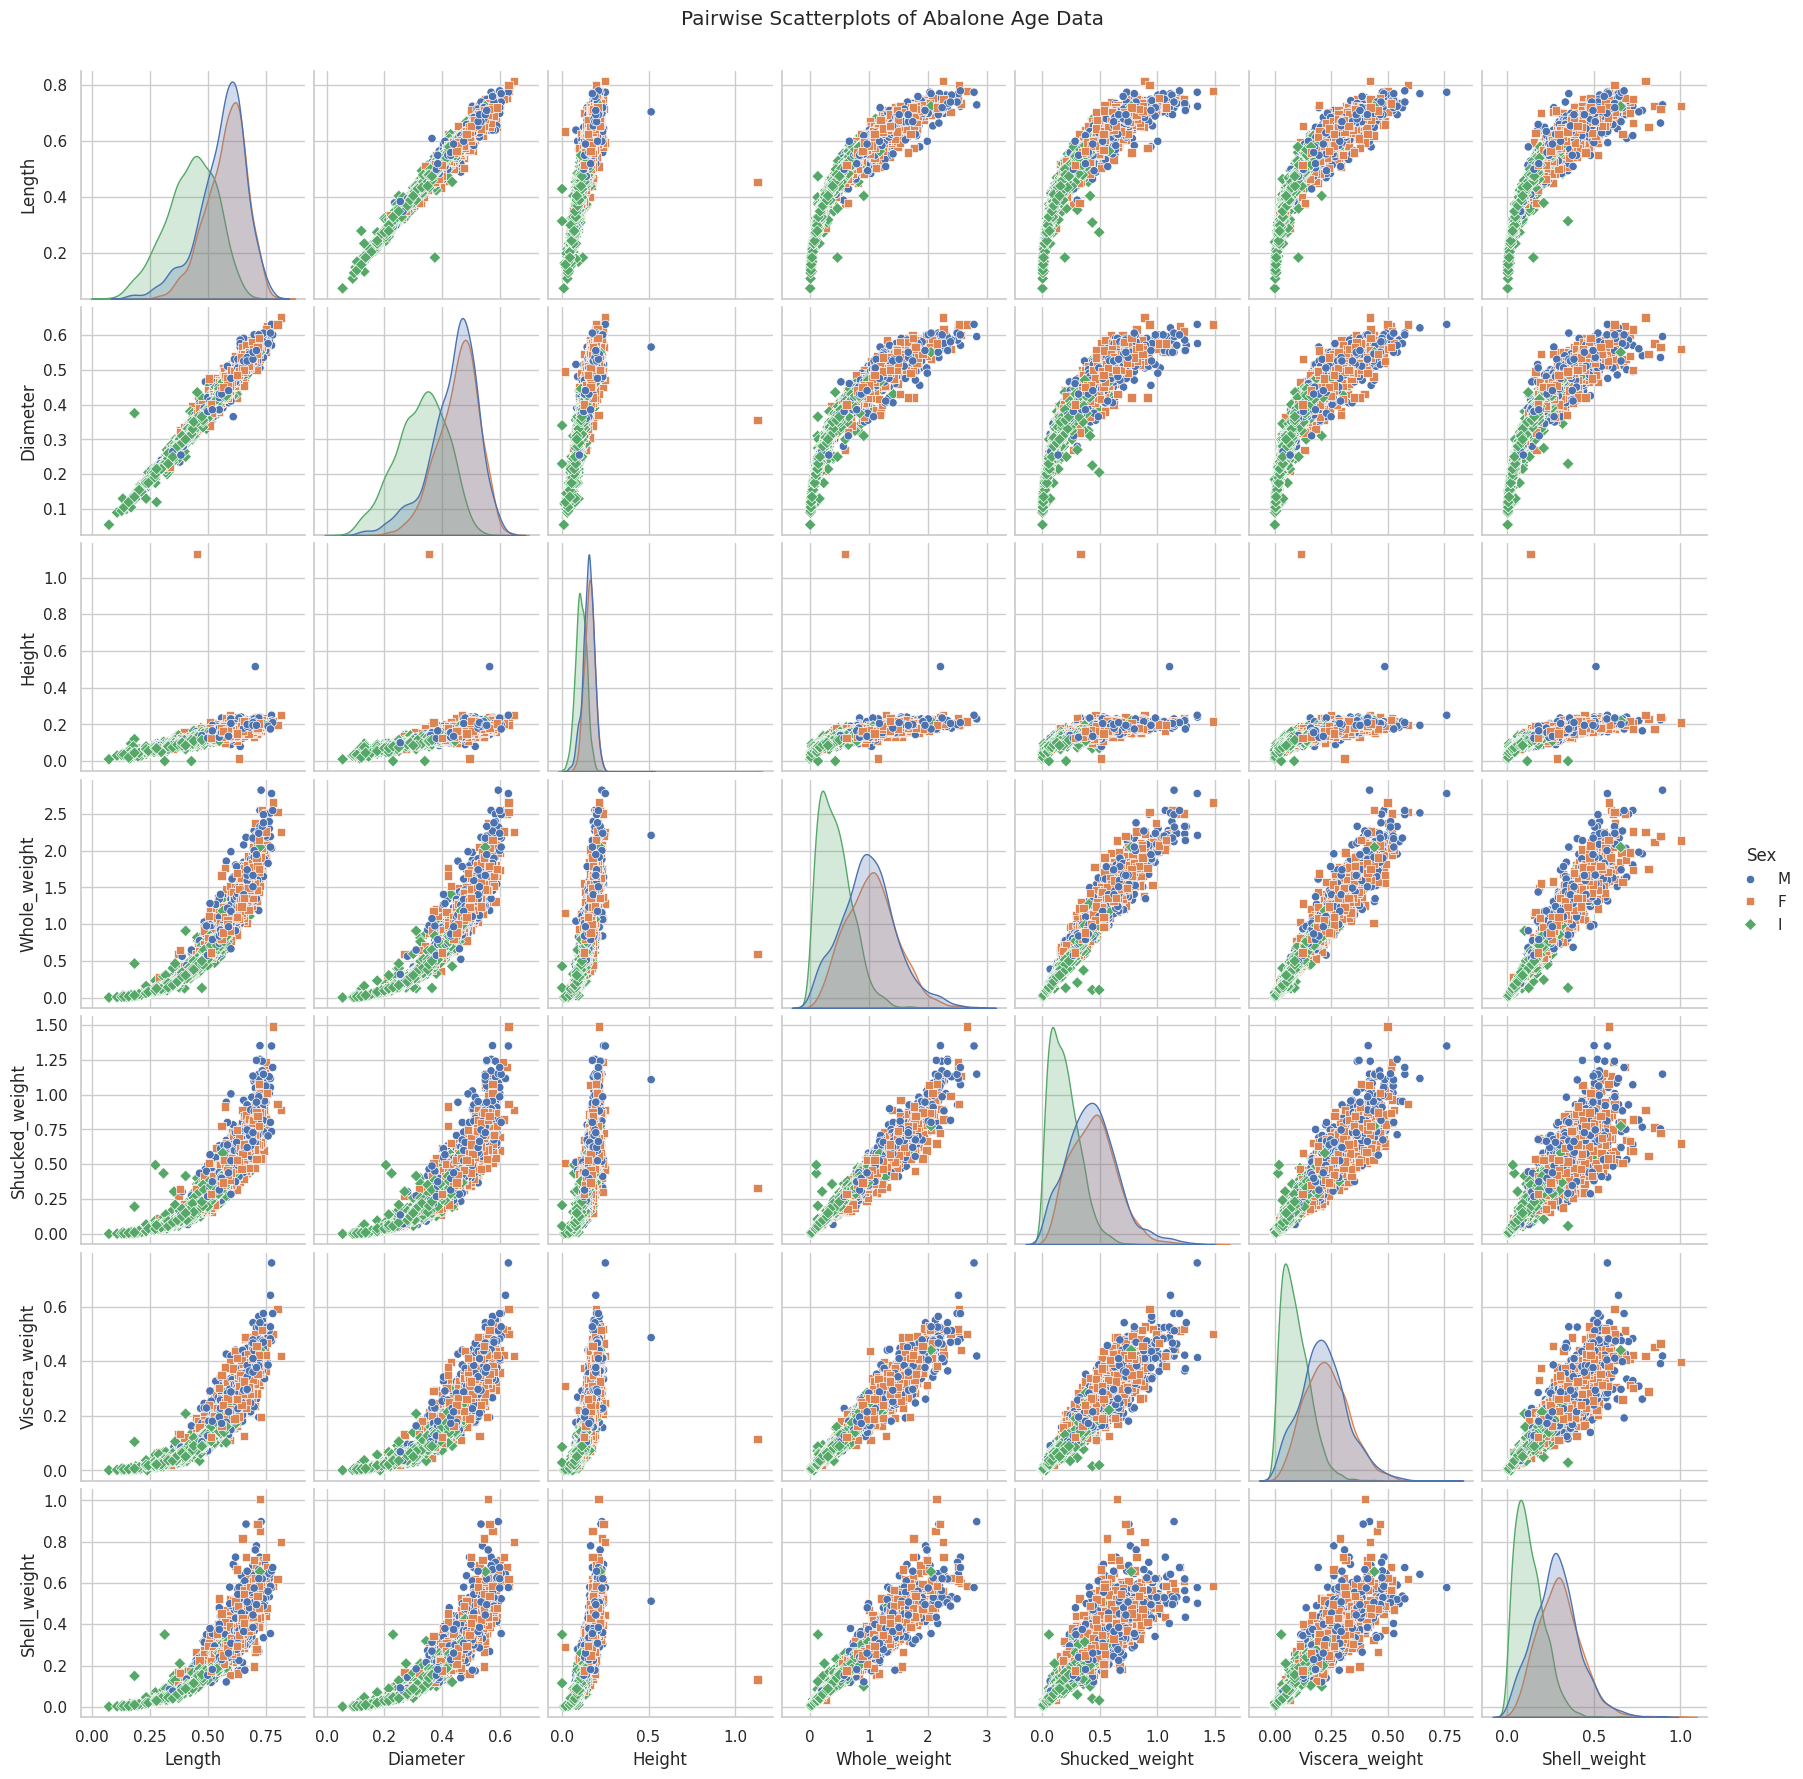

In [11]:
# Load the dataset
url_abalone = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone_data = pd.read_csv(url_abalone, header=None)

# Assign meaningful names to the columns
abalone_data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

# Set up the seaborn style
sns.set(style="whitegrid")

# Create pairwise scatterplots for abalone data
plt.figure(figsize=(15, 10))
sns.pairplot(abalone_data, vars=['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight'], hue='Sex', markers=["o", "s", "D"])
plt.suptitle('Pairwise Scatterplots of Abalone Age Data', y=1.02)
plt.show()


Description of Results
From the pairwise scatterplots of the abalone data, we can observe the following:

Length vs. Diameter: There is a strong linear relationship between Length and Diameter, suggesting that larger abalones have greater diameters. This relationship is consistent across different sexes.

Whole_weight vs. Length: Whole weight increases with length, indicating that the overall size and weight of abalones are positively correlated. This feature might be useful in predicting age as larger abalones tend to be older.

Height vs. Diameter: The relationship between Height and Diameter is less clear, with more variance observed in the data. This might indicate that Height is less informative compared to other variables.

Shucked_weight vs. Whole_weight: A strong linear relationship is observed here, indicating that abalones with higher whole weights also have higher shucked weights.

Viscera_weight vs. Shell_weight: There is a noticeable linear trend, with higher viscera weights associated with higher shell weights, which could be indicative of the overall maturity and age of the abalones.

### 5. Observations and Informative Attributes

From the scatterplots, identify which attributes are likely to be informative:

Length, Diameter, and Whole_weight may show strong relationships with the outcome variable (Rings).

# Extra Credit: Boxplots

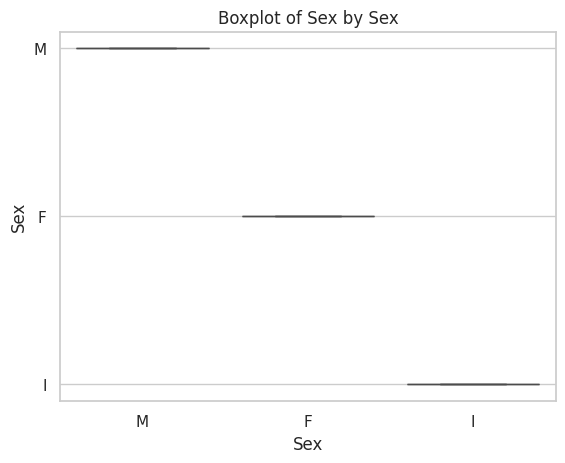

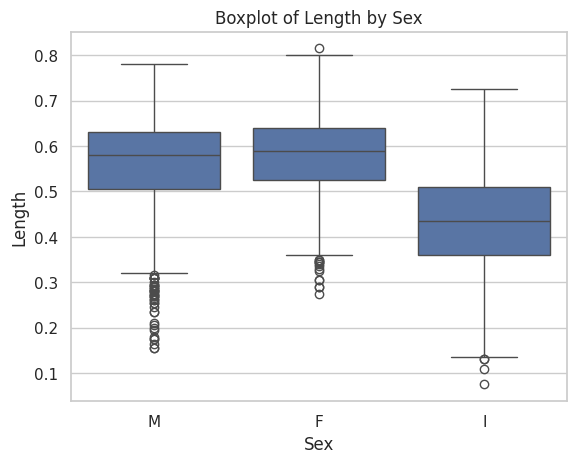

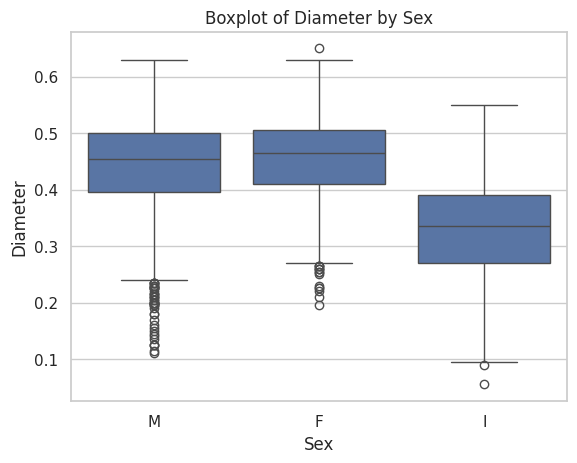

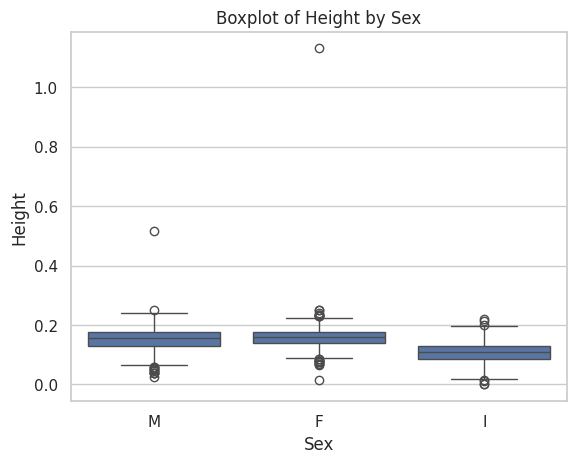

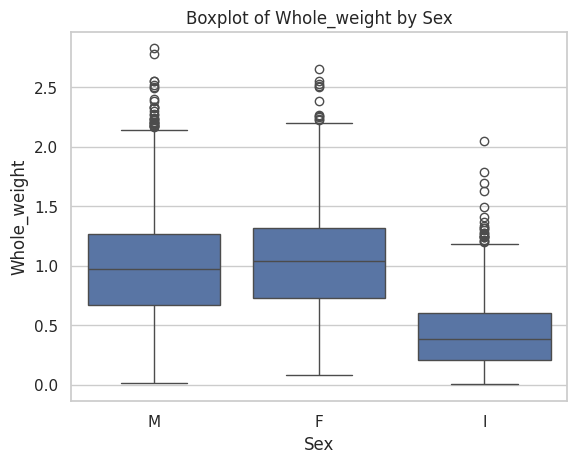

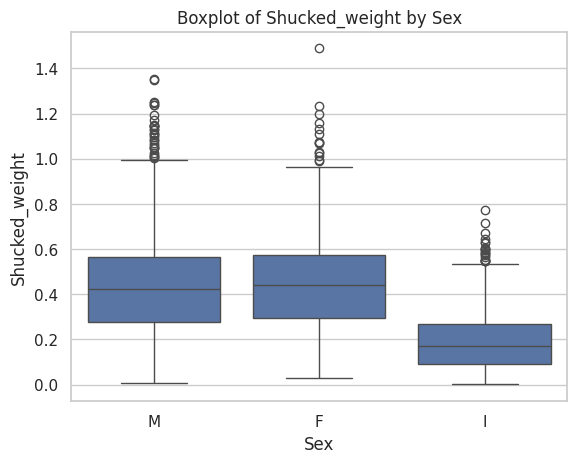

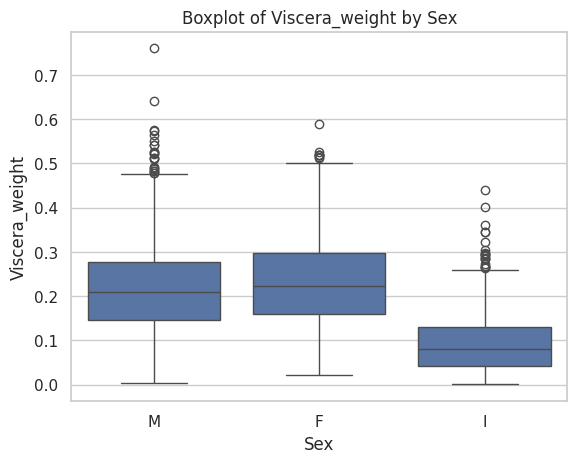

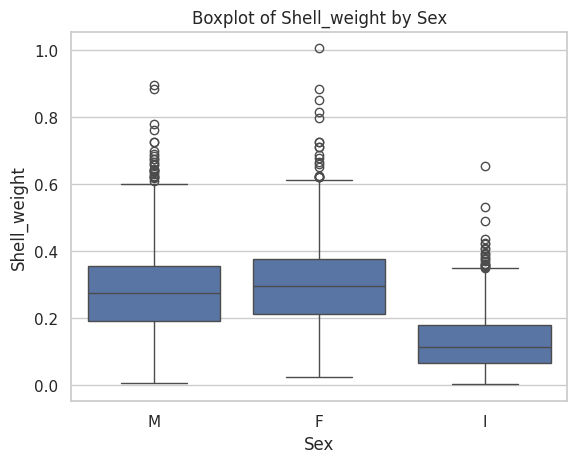

In [13]:
# Generate boxplots for continuous and categorical predictors
for predictor in predictors_abalone:
    sns.boxplot(x='Sex', y=predictor, data=abalone_data)
    plt.title(f'Boxplot of {predictor} by Sex')
    plt.show()
